In [185]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1.  Grab an image with alpha, and background of your choosing and composite them.. 

In [151]:
import skimage.io

In [152]:
alpha = skimage.io.imread('http://grail.cs.washington.edu/projects/digital-matting/image-matting/summary/lion/alpha.primatte.png')
rgb = skimage.io.imread(r'http://grail.cs.washington.edu/projects/digital-matting/image-matting/summary/lion/comp-black.truth.png')
bkg = skimage.io.imread('https://cdn.mos.cms.futurecdn.net/FUE7XiFApEqWZQ85wYcAfM.jpg')

In [153]:
alpha = skimage.img_as_float(alpha)
rgb = skimage.img_as_float(rgb)
bkg = skimage.img_as_float(bkg)

In [154]:
import skimage.transform
bkg = skimage.transform.resize(bkg, rgb.shape, mode='reflect', anti_aliasing=True)

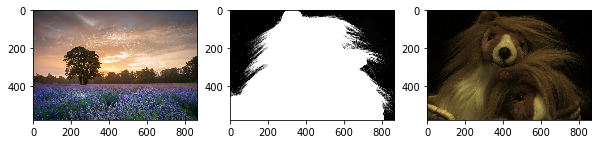

In [155]:
gray();
figsize(10,3)
subplot(1,3,1)
imshow(bkg)

subplot(1,3,2)
imshow(alpha)
#colorbar();

subplot(1,3,3)
imshow(rgb)

In [156]:
alpha = alpha[:,:,None]

In [157]:
comp = (1-alpha)*bkg + alpha*rgb

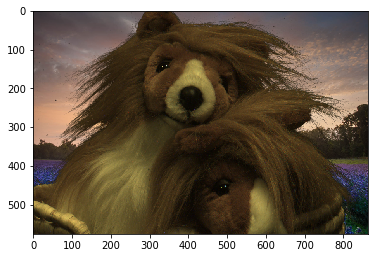

In [158]:
figsize(6,6)
imshow(comp);

# 2.  Grab an image and use a variety of edge detectors including sobel_h, sobel_v, sobel, prewitt filter, canny. 


In [159]:
from skimage.data import coffee

In [160]:
im = coffee()
im = skimage.color.rgb2gray(im)

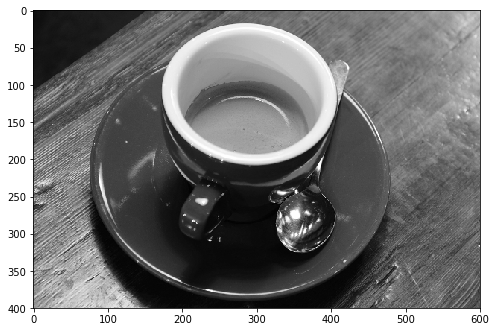

In [161]:
figsize(8,8)
imshow(im)

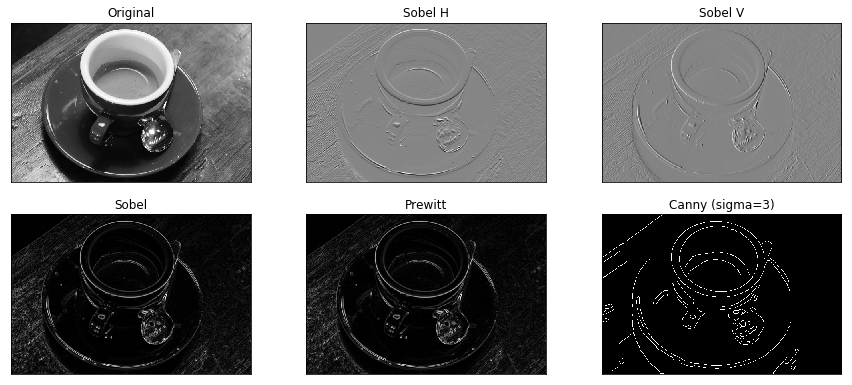

In [162]:
figsize(15, 10)

subplot(3,3,1)
title('Original')
imshow(im)
xticks([]);yticks([]);

subplot(3,3,2)
title('Sobel H')
imshow(skimage.filters.sobel_h(im));
xticks([]);yticks([]);

subplot(3,3,3)
title('Sobel V')
imshow(skimage.filters.sobel_v(im));
xticks([]);yticks([]);

subplot(3,3,4)
title('Sobel')
imshow(skimage.filters.sobel(im));
xticks([]);yticks([]);

subplot(3,3,5)
title('Prewitt')
imshow(skimage.filters.prewitt(im));
xticks([]);yticks([]);

subplot(3,3,6)
title('Canny (sigma=3)')
imshow(skimage.feature.canny(im, sigma=3));
xticks([]);yticks([]);


#colorbar()

# 3.   Do sobel_h filter on an image of your choosing, where you manually specify the filter weights and use convolution. 


In [ ]:
scipy.ndimage.convolve

# 4.   Show the  2D FFT of (3)

In [39]:
part3 = skimage.filters.sobel_h(im)

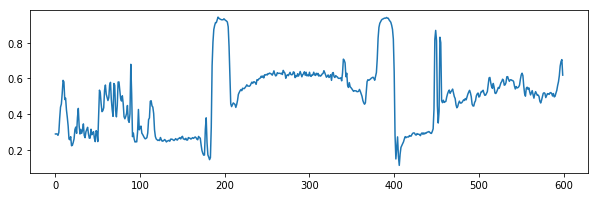

In [164]:
figsize(10,3)
plot(im[150])

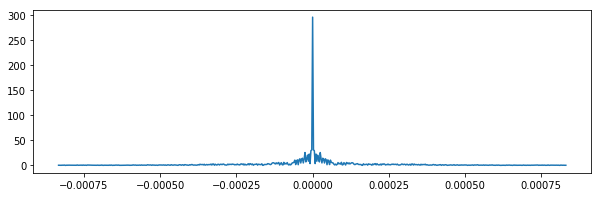

In [167]:
plot(
     np.fft.fftshift(np.fft.fftfreq(600,600)),
    np.fft.fftshift( np.abs(np.fft.fft(im[150]))));

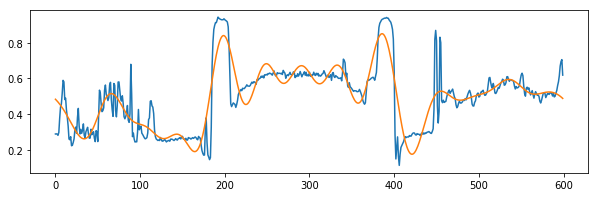

In [175]:
F = np.fft.fft(im[150])
x = arange(0, 600)
plot(im[150])
plot(  F[0 ].real/600 + F[0].imag/600
     + F[1 ].real*cos(-2*pi*x*1/600)/300  + F[1 ].imag*sin(-2*pi*x*1/600)/300
     + F[2 ].real*cos(-2*pi*x*2/600)/300  + F[2 ].imag*sin(-2*pi*x*2/600)/300
     + F[3 ].real*cos(-2*pi*x*3/600)/300  + F[3 ].imag*sin(-2*pi*x*3/600)/300
     + F[4 ].real*cos(-2*pi*x*4/600)/300  + F[4 ].imag*sin(-2*pi*x*4/600)/300
     + F[5 ].real*cos(-2*pi*x*5/600)/300  + F[5 ].imag*sin(-2*pi*x*5/600)/300
     + F[6 ].real*cos(-2*pi*x*6/600)/300  + F[6 ].imag*sin(-2*pi*x*6/600)/300
     + F[7 ].real*cos(-2*pi*x*7/600)/300  + F[7 ].imag*sin(-2*pi*x*7/600)/300
     + F[8 ].real*cos(-2*pi*x*8/600)/300  + F[8 ].imag*sin(-2*pi*x*8/600)/300
     + F[9 ].real*cos(-2*pi*x*9/600)/300  + F[9 ].imag*sin(-2*pi*x*9/600)/300
     + F[10].real*cos(-2*pi*x*10/600)/300 + F[10].imag*sin(-2*pi*x*10/600)/300
     + F[11].real*cos(-2*pi*x*11/600)/300 + F[11].imag*sin(-2*pi*x*11/600)/300
     + F[12].real*cos(-2*pi*x*12/600)/300 + F[12].imag*sin(-2*pi*x*12/600)/300
     + F[13].real*cos(-2*pi*x*13/600)/300 + F[13].imag*sin(-2*pi*x*13/600)/300
     + F[14].real*cos(-2*pi*x*14/600)/300 + F[14].imag*sin(-2*pi*x*14/600)/300
    )

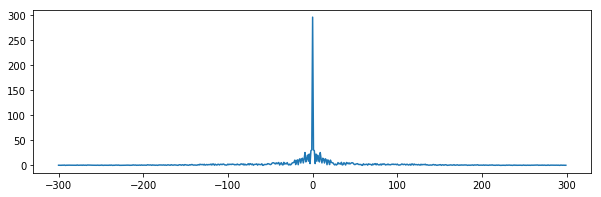

In [148]:
plot(arange(-im.shape[1]/2, im.shape[1]/2),   np.fft.fftshift(np.abs(np.fft.fft(im[150]))));

(0, 50)

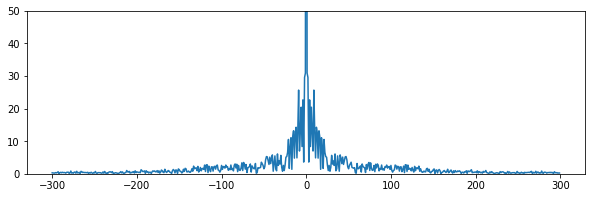

In [149]:
plot(arange(-im.shape[1]/2, im.shape[1]/2),  
     np.fft.fftshift(np.abs(np.fft.fft(im[150]))));
ylim(0, 50)

(-10, 50)

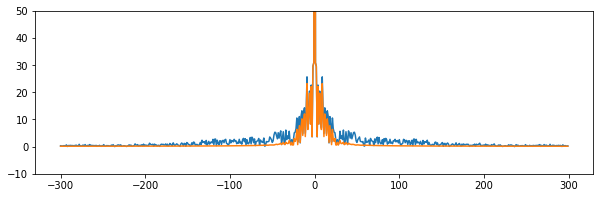

In [176]:
plot(arange(-im.shape[1]/2, im.shape[1]/2),   np.fft.fftshift(np.abs(np.fft.fft(im[150]))));
plot(arange(-im.shape[1]/2, im.shape[1]/2),   
     np.fft.fftshift(np.abs(np.fft.fft( 
         scipy.ndimage.gaussian_filter1d(im[150], sigma=5) ))));
ylim(-10, 50)

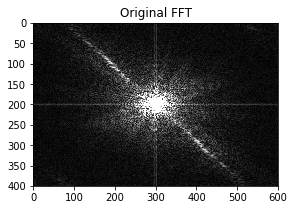

In [184]:
subplot(121)
title('Original FFT')
imshow(np.fft.fftshift(np.abs(np.fft.fft2(im))),vmin=0, vmax=200);

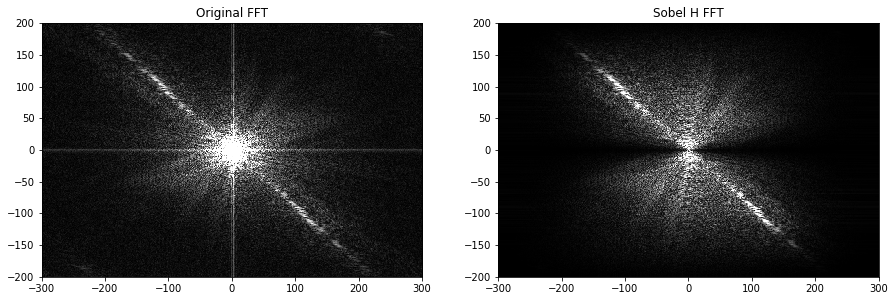

In [88]:
subplot(121)
title('Original FFT')
imshow(np.fft.fftshift(np.abs(np.fft.fft2(im))), vmin=0, vmax=200, 
       extent=(-im.shape[1]/2, im.shape[1]/2, -im.shape[0]/2, im.shape[0]/2)
      );
subplot(122)
title('Sobel H FFT')
imshow(np.fft.fftshift(np.abs(np.fft.fft2(part3))), vmin=0,vmax=200, 
       extent=(-im.shape[1]/2, im.shape[1]/2, -im.shape[0]/2, im.shape[0]/2));